In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [39]:
'''import necessary libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print('all libraries import perfectly')

all libraries import perfectly


In [40]:
'''loading the dataset'''
dataset = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
'''preprocessing the data'''
mean=[]
for i in dataset.columns:
    if(i=='Outcome'):
        break
    mean.append(dataset[i].mean())
    
count=0
for i in dataset.columns:
    if(i=='Outcome'):
        break
    dataset.loc[dataset[i]==0,i]=mean[count]
    count+=1

In [42]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47.0,1


In [43]:
'''making of dependent(y) and independent variables(x)'''
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]
X.shape,Y.shape

((768, 8), (768,))

In [44]:
'''preparing the keras model'''
model = Sequential()
model.add(Dense(12,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print('model prepare successfully')

model prepare successfully


In [45]:
'''compile the keras model'''
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print('model compile successfully')

model compile successfully


In [46]:
'''after that we have to fit the model with our dataset and run for specific number of epochs(iterations) and also tell the batch size in the arguments'''
history=model.fit(X,Y,epochs=150,batch_size=10)


Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 6.8998 - accuracy: 0.5495
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.6055 - accuracy: 0.6315
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.4536 - accuracy: 0.6406
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2814 - accuracy: 0.6484
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0812 - accuracy: 0.6562
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9534 - accuracy: 0.6549
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.6628
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7553 - accuracy: 0.6589
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.6901
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.6589
Epoch 11/

In [47]:
'''now we have to evaluate our model on above processing'''
accuracy = model.evaluate(X,Y)
print(accuracy)

24/24 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7760
[0.47707709670066833, 0.7760416865348816]


In [48]:
'''after getting output we have to predict the output based on above output'''
predict_output = model.predict(X)
predict_output.shape
'''rounding up the predictions'''
rounded = [round(x[-1])for x in predict_output]

24/24 [==============================] - 0s 1ms/step


In [49]:
'''convert data to 1 if prediction more than 0.5 otherwise 0'''
predict_output = (model.predict(X)>0.5).astype(int)
predict_output.shape

24/24 [==============================] - 0s 1ms/step


(768, 1)

In [63]:
X.iloc[[0]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,79.799479,33.6,0.627,50.0


In [68]:
'''displaying the result'''
for i in range(5):
    print(X.iloc[[i]],Y[i],predict_output[i],end="\n")
    print()

   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0          6.0    148.0           72.0           35.0  79.799479  33.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0   1 [1]

   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
1          1.0     85.0           66.0           29.0  79.799479  26.6   

   DiabetesPedigreeFunction   Age  
1                     0.351  31.0   0 [0]

   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
2          8.0    183.0           64.0      20.536458  79.799479  23.3   

   DiabetesPedigreeFunction   Age  
2                     0.672  32.0   1 [1]

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3          1.0     89.0           66.0           23.0     94.0  28.1   

   DiabetesPedigreeFunction   Age  
3                     0.167  21.0   0 [0]

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4     3.845052    13

In [70]:
output = list(Y)
pred_outpt = list(predict_output) 
X['output']=output
X['prediction']=pred_outpt

In [76]:
for i in range(5):
    print(X.iloc[[i]])

   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0          6.0    148.0           72.0           35.0  79.799479  33.6   

   DiabetesPedigreeFunction   Age  output prediction  
0                     0.627  50.0       1        [1]  
   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
1          1.0     85.0           66.0           29.0  79.799479  26.6   

   DiabetesPedigreeFunction   Age  output prediction  
1                     0.351  31.0       0        [0]  
   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
2          8.0    183.0           64.0      20.536458  79.799479  23.3   

   DiabetesPedigreeFunction   Age  output prediction  
2                     0.672  32.0       1        [1]  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3          1.0     89.0           66.0           23.0     94.0  28.1   

   DiabetesPedigreeFunction   Age  output prediction  
3                     0

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


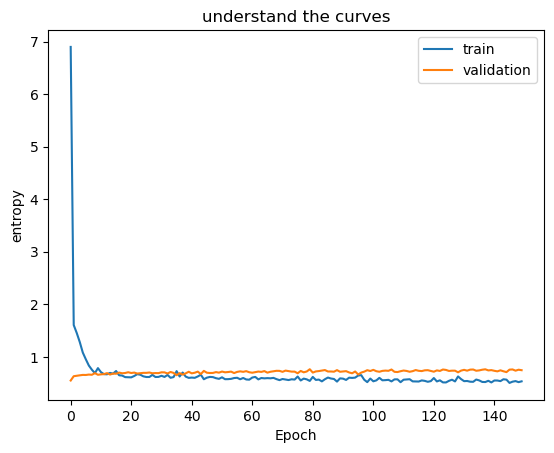

In [55]:
plt.title('understand the curves')
plt.xlabel('Epoch')
plt.ylabel('entropy')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['accuracy'],label='validation')
plt.legend()
plt.show()

In [56]:
model.save('model.h5')

In [72]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')
pred=[20,200,125,100,850,68,2.45,85]
pred_out = model.predict([pred])
print('Predicted: %.3f' % pred_out[0])

1/1 [==============================] - 0s 100ms/step
Predicted: 0.999
